In [ ]:
import numpy as np
import pandas as pd

In [ ]:
mk = pd.read_csv('marketing_campaign.csv')

In [ ]:
mk.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
mk=mk.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
mk.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
mk.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [ ]:
# converting columns to DateTime format
from datetime import date
mk['Year_Birth'] = pd.to_datetime(mk['Year_Birth'], format ='%Y') # int 자료형을 datetime으로 변환
mk['Dt_Customer'] = pd.to_datetime(mk['Dt_Customer'])  # object 자료형을 datetime으로 변환

# 이상치 제거

1. age 100살 이상 지우기

In [ ]:
a = mk[mk['Age'] >= 100].index
mk.drop(a, inplace=True)

In [ ]:
 mk[mk['Age'] >= 100].index

Int64Index([], dtype='int64')

2. income 결측치 24개 지우기

In [ ]:
mk = mk.dropna()

In [ ]:
mk.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProducts        0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
TotalMntSpent          0
TotalNumPurchases      0
Total_Acc_Cmp          0
Children               0
Year_Joined            0
Month_Joined           0
Day_Joined             0
Age                    0
Years_Customer         0
Days_Customer          0
dtype: int64

3. Income 이상치 8개 지우기

In [ ]:
b = mk[mk['Income'] > 140000].index
mk.drop(b, inplace=True)

## 파생변수 만들기

In [ ]:
#제품에 지출된 총액
mk['TotalMntSpent'] = mk['MntWines'] + mk['MntFruits'] + mk['MntMeatProducts'] + mk['MntFishProducts'] + mk['MntSweetProducts'] + mk['MntGoldProducts']

In [ ]:
#총 구매 건수
mk['TotalNumPurchases'] = mk['NumWebPurchases'] + mk['NumCatalogPurchases'] + mk['NumStorePurchases'] + mk['NumDealsPurchases']

In [ ]:
# 승인된 총 캠페인 수
mk['Total_Acc_Cmp'] = mk['AcceptedCmp1'] + mk['AcceptedCmp2'] + mk['AcceptedCmp3'] + mk['AcceptedCmp4'] + mk['AcceptedCmp5'] + mk['Response']

In [ ]:
# 결혼상태 파트너 생성 변수를 그냥 없애고 결혼상태를 이진분류로 바꿔줌
mk['Marital_Status'] = mk['Marital_Status'].replace(['Married', 'Together'],'relationship')
mk['Marital_Status'] = mk['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [ ]:
# 가구 내 총 자녀 수
mk["Children"] = mk["Kidhome"] +  mk["Teenhome"]

In [ ]:
# 교육 수준을 세 그룹으로 세분화
mk["Education"]=mk["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
# 가입한 날짜, 월 및 연도에 대한 열 추가
mk['Year_Joined'] = mk['Dt_Customer'].dt.year # 연도 추출
mk['Month_Joined'] = mk['Dt_Customer'].dt.strftime("%B") # strftime: 날짜 형식 변환 %B:locale 월
mk['Day_Joined'] = mk['Dt_Customer'].dt.day_name() # day_name: 요일을 문자열로 추출

In [ ]:
# 연령 및 연도 생성_고객
mk['Age'] = (mk["Dt_Customer"].dt.year.max()) - (mk['Year_Birth'].dt.year)
mk['Years_Customer'] = (mk["Dt_Customer"].dt.year.max()) - (mk['Dt_Customer'].dt.year)
mk['Days_Customer'] = (mk["Dt_Customer"].max()) - (mk['Dt_Customer'])

## 필요없는 변수 삭제

In [ ]:
print(mk.shape)
pd.options.display.max_columns = None
mk.head()

(2205, 37)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Year_Joined,Month_Joined,Day_Joined,Age,Years_Customer,Days_Customer
0,5524,1957-01-01,Graduate,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,25,1,0,2012,April,Monday,57,2,971 days
1,2174,1954-01-01,Graduate,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,6,0,2,2014,August,Sunday,60,0,125 days
2,4141,1965-01-01,Graduate,relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,21,0,0,2013,August,Wednesday,49,1,472 days
3,6182,1984-01-01,Graduate,relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,8,0,1,2014,October,Thursday,30,0,65 days
4,5324,1981-01-01,Postgraduate,relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,19,0,1,2014,January,Sunday,33,0,321 days


year_birth으로 나이 파생변수 만들었으니까 삭제, ID는 필요없으니까 삭제, kidhome+teenhome으로 children 변수 생성했으니까 둘도 삭제, day_joined, year_joined, month_joined 는 필요없을것 같음 

In [ ]:
 mk.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalMntSpent',
       'TotalNumPurchases', 'Total_Acc_Cmp', 'Children', 'Year_Joined',
       'Month_Joined', 'Day_Joined', 'Age', 'Years_Customer', 'Days_Customer'],
      dtype='object')

In [ ]:
mk.drop(['ID','Year_Birth','Kidhome','Teenhome','Dt_Customer','Day_Joined'],axis=1, inplace=True)

In [ ]:
mk.drop(['Year_Joined','Month_Joined'],axis=1, inplace=True)

In [ ]:
mk.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalMntSpent',
       'TotalNumPurchases', 'Total_Acc_Cmp', 'Children', 'Age',
       'Years_Customer', 'Days_Customer'],
      dtype='object')

In [ ]:
mk['Days_Customer'] = mk['Days_Customer'].dt.days.astype('int16')

In [ ]:
mk['Marital_Status'].value_counts()
mk['Marital_Status'] = np.where(mk['Marital_Status']=='Single', 0, 1) # single:0, relationship:1

In [ ]:
mk['Education'].value_counts()

Graduate         1113
Postgraduate      840
Undergraduate     252
Name: Education, dtype: int64

In [ ]:
mk_dummies=pd.get_dummies(mk[['Education']],drop_first=True)

In [ ]:
mk.drop(['Education'],axis=1, inplace=True)

In [ ]:
mk1 = pd.concat([mk ,mk_dummies], axis=1)

In [ ]:
mk1.head()

,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Age,Years_Customer,Days_Customer,Education_Postgraduate,Education_Undergraduate
0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,25,1,0,57,2,971,0,0
1,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,6,0,2,60,0,125,0,0
2,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,21,0,0,49,1,472,0,0
3,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,8,0,1,30,0,65,0,0
4,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,19,0,1,33,0,321,1,0


In [ ]:
mk2 = mk1.copy()

In [ ]:
mk2.shape

(2205, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(mk2.values)
scaled_features_df = pd.DataFrame(scaled_features, index=mk2.index, columns=mk2.columns)

In [ ]:
scaled_features_df2 = scaled_features_df.copy()

# **PCA**

1. 주성분을 15개로

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
printcipalComponents = pca.fit_transform(scaled_features_df2)

In [ ]:
principalDf = pd.DataFrame(data=printcipalComponents)

In [ ]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4.626826,-0.732701,2.192871,-2.258640,-0.614009,-1.517846,-0.140501,1.156611,-0.756811,-1.119511,-0.432268,0.707317,-0.146680,-0.332165,1.071038
1,-2.977074,0.249360,-1.823924,1.319502,-0.749990,0.079489,-0.331321,1.438656,-0.385185,-1.373196,-0.405060,0.575342,0.019357,0.666761,-0.246442
2,1.694708,-1.545782,-0.438967,0.111101,0.038774,0.223637,-0.801551,-0.464745,0.791200,-0.004632,0.787283,0.173958,1.076070,-0.515055,0.510885
3,-2.957046,0.282484,-1.979979,0.292566,-0.625951,0.955676,-0.711500,-0.518415,0.486928,1.135478,-0.119390,0.732542,0.377566,0.009749,0.071000
4,-0.318534,-1.006434,-0.503290,1.552025,-0.225550,0.655304,0.863749,-0.621087,-0.587307,1.598141,-0.621153,-0.035804,-1.232454,-0.452483,0.407269


In [ ]:
pca.explained_variance_ratio_

array([0.28658165, 0.08712701, 0.08457945, 0.06431368, 0.04271084,
       0.04204789, 0.03402652, 0.03348785, 0.03343754, 0.02922879,
       0.0282292 , 0.02598219, 0.02281934, 0.02099297, 0.02039908])

In [ ]:
sum(pca.explained_variance_ratio_)

0.8559640071281186

15개의 주성분이 전체 분산의 약 85%를 설명해준다

2. 분산의 95%를 보존해주는 개수 : 20개

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
printcipalComponents = pca.fit_transform(scaled_features_df2)

principalDf = pd.DataFrame(data=printcipalComponents)
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,4.626826,-0.732701,2.192870,-2.258639,-0.614008,-1.517860,-0.140510,1.156609,-0.756825,-1.119526,-0.432344,0.707236,-0.146868,-0.332425,1.071419,1.018276,0.192849,1.718145,1.352576,0.476493,-0.697853
1,-2.977074,0.249360,-1.823924,1.319501,-0.749991,0.079497,-0.331316,1.438656,-0.385173,-1.373181,-0.405018,0.575398,0.019468,0.666909,-0.246645,-0.411948,0.099570,-0.067480,0.374257,-0.008643,-0.376759
2,1.694708,-1.545782,-0.438966,0.111097,0.038772,0.223655,-0.801538,-0.464748,0.791234,-0.004582,0.787367,0.174114,1.076327,-0.514728,0.510453,-0.676559,0.597109,0.424113,-0.424843,-0.620947,-0.026510
3,-2.957046,0.282484,-1.979979,0.292571,-0.625949,0.955669,-0.711507,-0.518402,0.486880,1.135394,-0.119397,0.732363,0.377409,0.009576,0.071072,-0.132220,0.045431,0.497025,0.186167,0.072232,0.155952
4,-0.318534,-1.006434,-0.503289,1.552018,-0.225553,0.655317,0.863761,-0.621102,-0.587242,1.598251,-0.621126,-0.035557,-1.232210,-0.452204,0.407081,0.852814,-0.141811,0.441161,-0.169478,-0.056942,0.514089


In [ ]:
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

0.9538415894093275

Text(0, 0.5, '주성분')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text

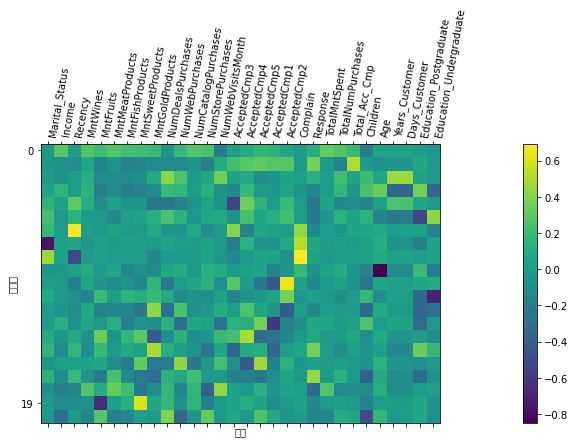

In [ ]:
plt.figure(figsize=(30,5))
plt.matshow(pca.components_,fignum=1)
plt.yticks([0,19])
plt.colorbar()
plt.xticks(range(len(scaled_features_df2.columns)),scaled_features_df2.columns,rotation=80, ha='left')
plt.xlabel('특성')
plt.ylabel('주성분')

# **클러스터링**

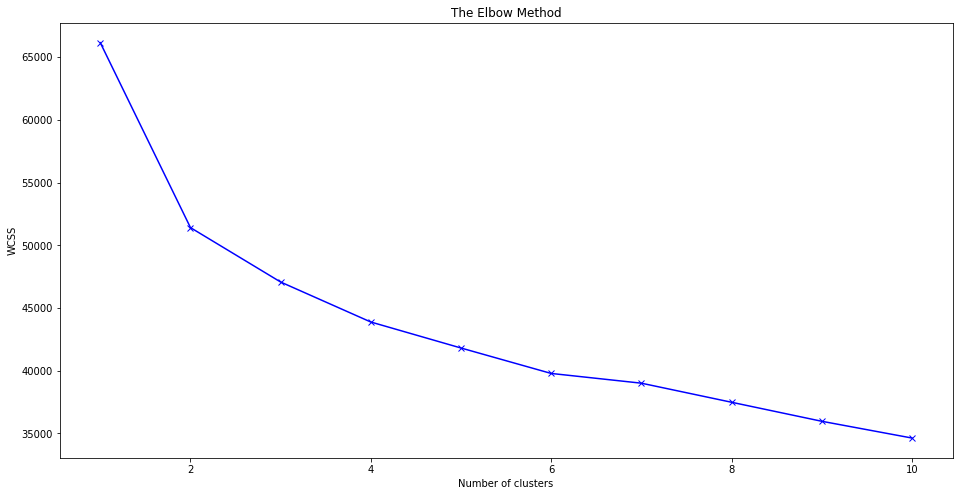

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

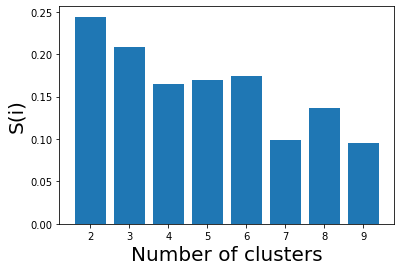

In [ ]:
from sklearn.metrics import silhouette_score 
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


In [ ]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

mk['cluster'] = pred + 1

## PCA 후 클러스터링

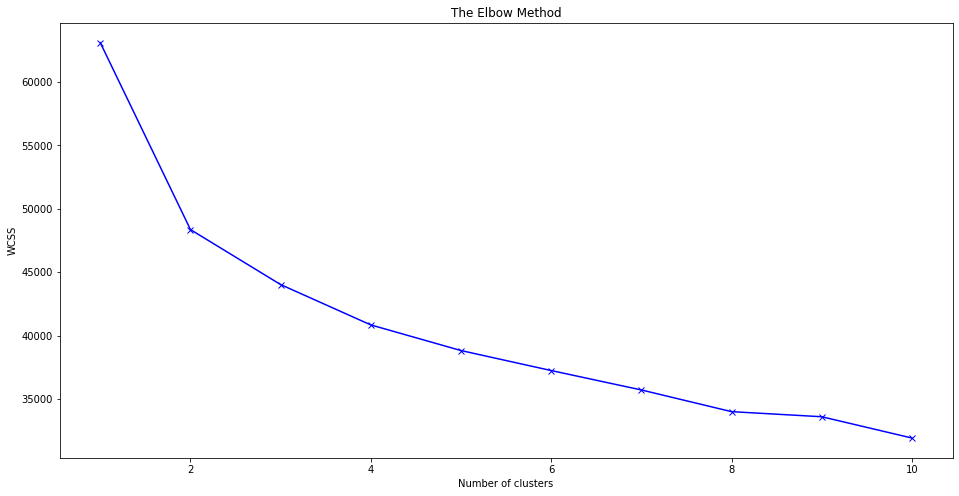

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(printcipalComponents)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

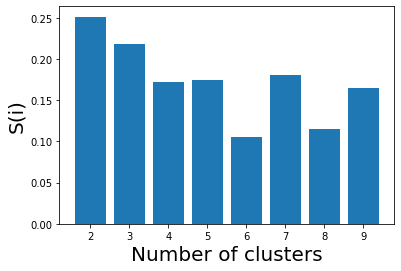

In [ ]:
from sklearn.metrics import silhouette_score 
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(printcipalComponents)
    silhouette_scores.append(silhouette_score(printcipalComponents, m1.fit_predict(printcipalComponents))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


In [ ]:
mk_pca = mk.copy()

In [ ]:
kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(printcipalComponents)
pred=kmeans.predict(printcipalComponents)
mk_pca['cluster'] = pred + 1

In [ ]:
mk_pca['cluster'].value_counts()

2    1309
1     896
Name: cluster, dtype: int64

In [ ]:
mk['cluster'].value_counts()

1    1307
2     898
Name: cluster, dtype: int64

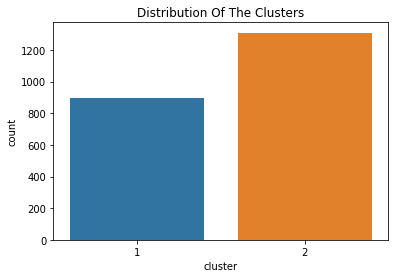

In [ ]:
import seaborn as sns
pl = sns.countplot(x=mk_pca["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

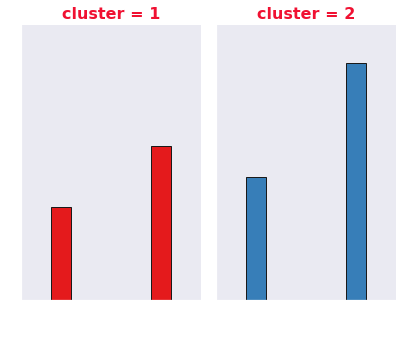

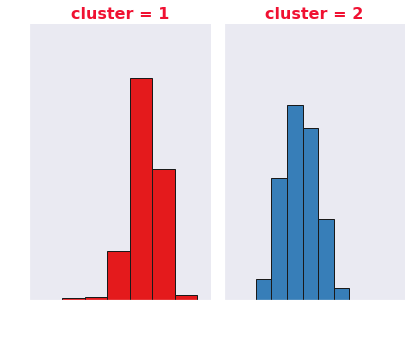

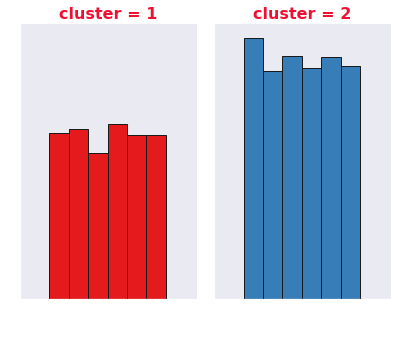

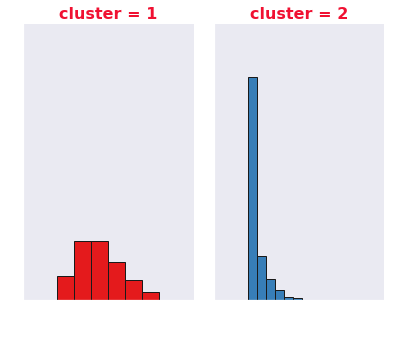

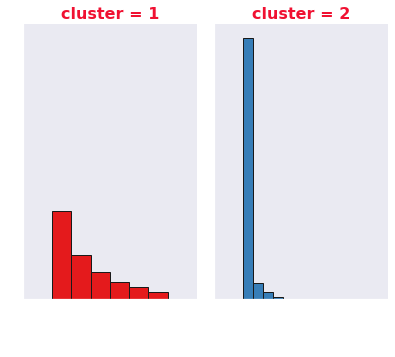

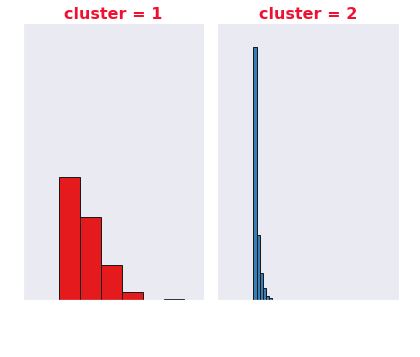

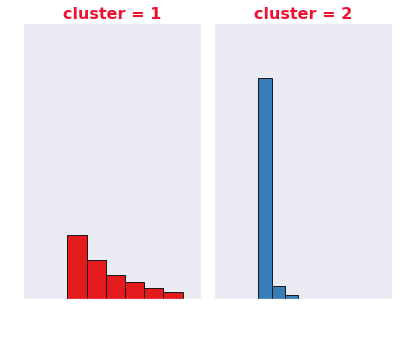

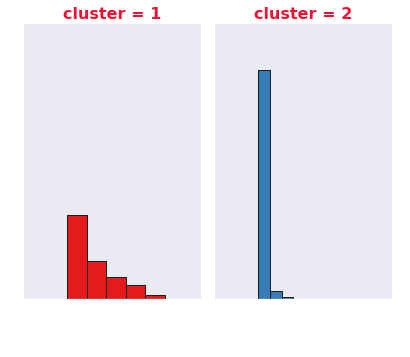

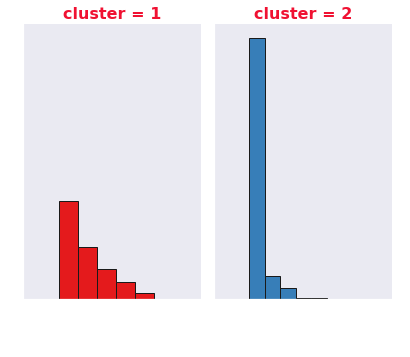

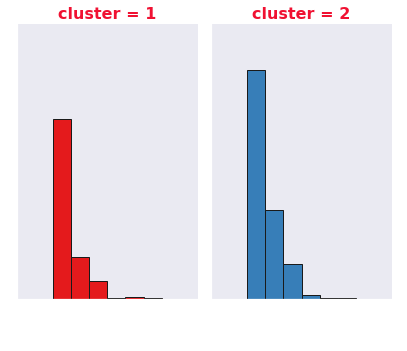

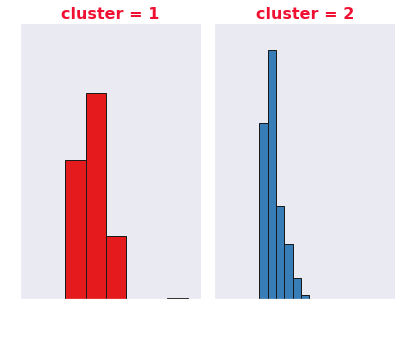

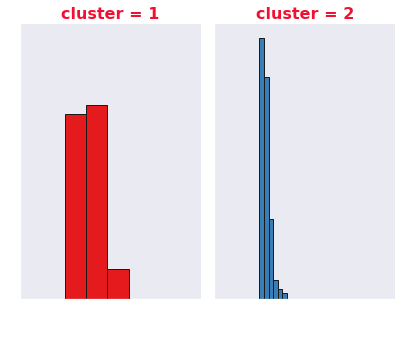

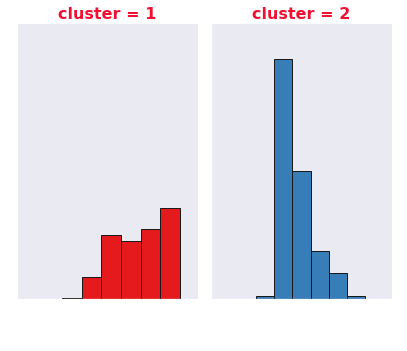

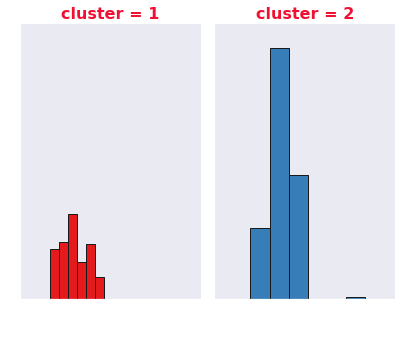

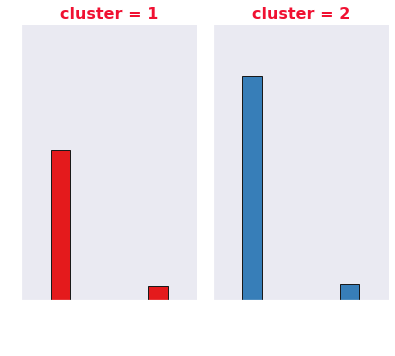

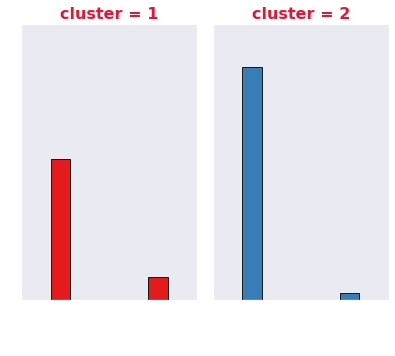

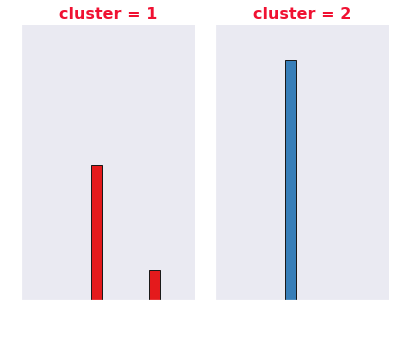

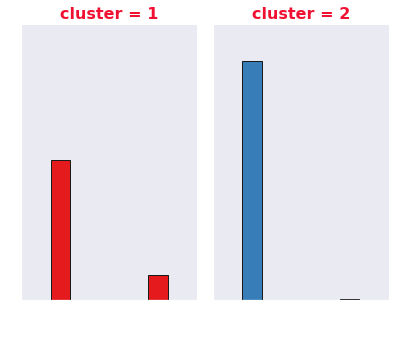

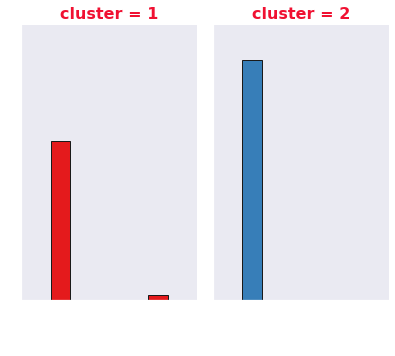

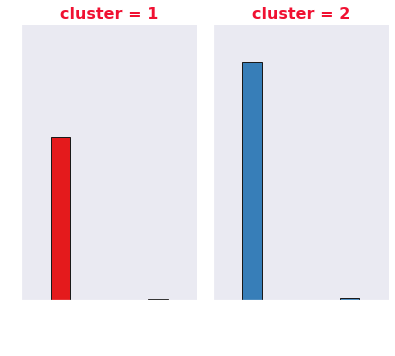

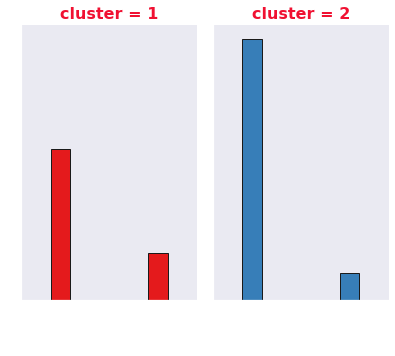

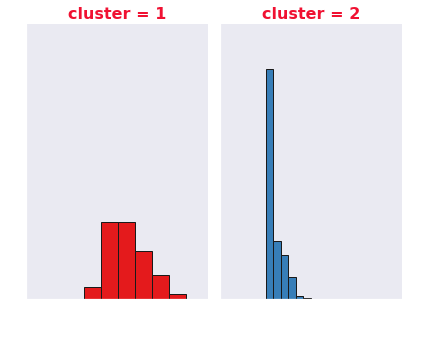

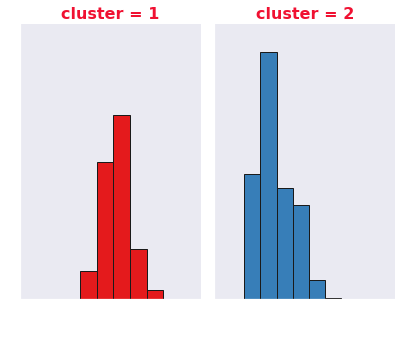

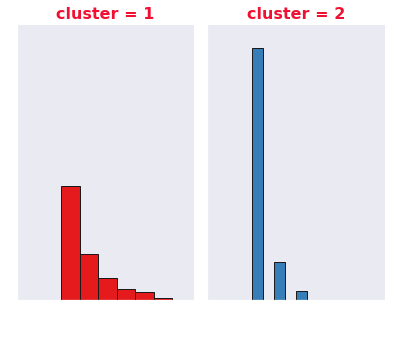

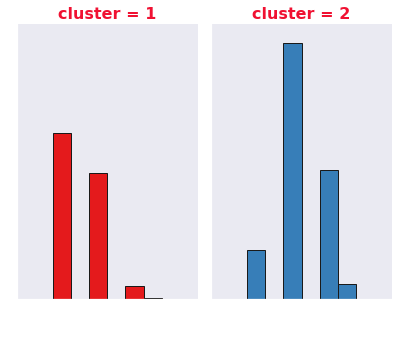

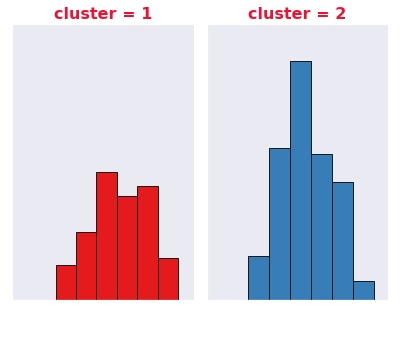

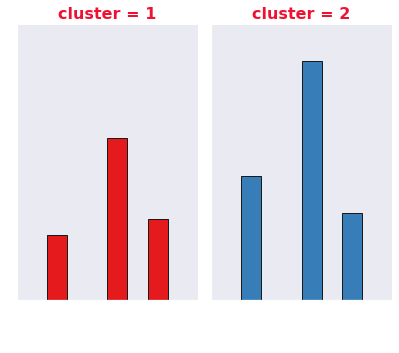

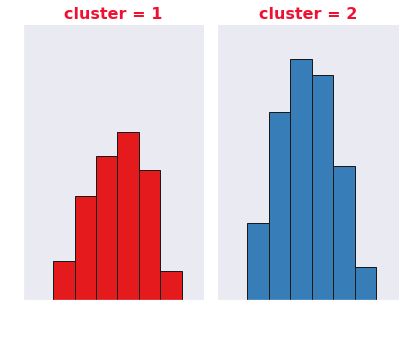

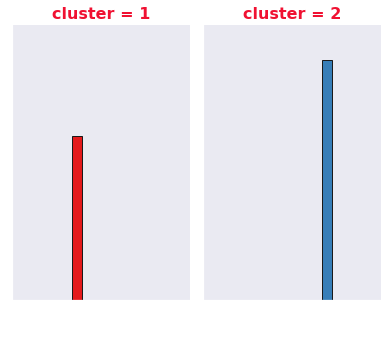

In [ ]:
# Clusters interpretation 
sns.set(rc={ 'axes.grid' : False})

for i in mk_pca:
    diag = sns.FacetGrid(mk_pca, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)